# Time-series models

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# suppress warning
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy

# Homework 1: Using ARIMA model to predict food_retail capital in Australia.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/australian_capital_retail.csv')

In [3]:
df.head()

,month,cafes_restaurants_and_catering_services,cafes_restaurants_and_takeaway_food_services,clothing_retailing,clothing_footwear_and_personal_accessory_retailing,department_stores,electrical_and_electronic_goods_retailing,food_retailing,footwear_and_other_personal_accessory_retailing,furniture_floor_coverings_houseware_and_textile_goods_retailing,...,household_goods_retailing,liquor_retailing,newspaper_and_book_retailing,other_recreational_goods_retailing,other_retailing,other_retailing_n.e.c.,other_specialised_food_retailing,pharmaceutical_cosmetic_and_toiletry_goods_retailing,supermarket_and_grocery_stores,takeaway_food_services
0,01-04-1982,4.4,7.6,3.7,5.9,10.3,4.4,15.5,2.2,2.7,...,9.7,1.2,2.3,1.1,8.1,2.2,1.6,2.5,12.7,3.2
1,01-05-1982,3.4,6.7,3.8,5.9,10.6,4.9,15.1,2.1,3.0,...,11.1,1.4,2.5,1.0,8.0,2.0,1.6,2.5,12.1,3.3
2,01-06-1982,3.6,7.1,3.2,5.1,9.9,4.8,15.5,2.0,2.5,...,9.9,1.3,2.3,1.0,7.8,2.0,1.7,2.5,12.5,3.5
3,01-07-1982,4.0,7.5,3.4,5.4,8.8,5.1,16.1,2.1,2.8,...,10.2,1.4,2.6,1.1,8.3,2.0,1.6,2.6,13.2,3.5
4,01-08-1982,3.6,7.3,3.1,5.0,8.8,4.6,15.8,2.0,2.8,...,10.1,1.6,2.6,0.9,8.4,2.0,1.6,2.8,12.7,3.7


## Task 1. Sum up the yearly capital of food retailing and visualize the timeline.


In [4]:
df['Month']= pd.to_datetime(df['month'])
df['Year'] = df['Month'].dt.year
df.head()

,month,cafes_restaurants_and_catering_services,cafes_restaurants_and_takeaway_food_services,clothing_retailing,clothing_footwear_and_personal_accessory_retailing,department_stores,electrical_and_electronic_goods_retailing,food_retailing,footwear_and_other_personal_accessory_retailing,furniture_floor_coverings_houseware_and_textile_goods_retailing,...,newspaper_and_book_retailing,other_recreational_goods_retailing,other_retailing,other_retailing_n.e.c.,other_specialised_food_retailing,pharmaceutical_cosmetic_and_toiletry_goods_retailing,supermarket_and_grocery_stores,takeaway_food_services,Month,Year
0,01-04-1982,4.4,7.6,3.7,5.9,10.3,4.4,15.5,2.2,2.7,...,2.3,1.1,8.1,2.2,1.6,2.5,12.7,3.2,1982-01-04,1982
1,01-05-1982,3.4,6.7,3.8,5.9,10.6,4.9,15.1,2.1,3.0,...,2.5,1.0,8.0,2.0,1.6,2.5,12.1,3.3,1982-01-05,1982
2,01-06-1982,3.6,7.1,3.2,5.1,9.9,4.8,15.5,2.0,2.5,...,2.3,1.0,7.8,2.0,1.7,2.5,12.5,3.5,1982-01-06,1982
3,01-07-1982,4.0,7.5,3.4,5.4,8.8,5.1,16.1,2.1,2.8,...,2.6,1.1,8.3,2.0,1.6,2.6,13.2,3.5,1982-01-07,1982
4,01-08-1982,3.6,7.3,3.1,5.0,8.8,4.6,15.8,2.0,2.8,...,2.6,0.9,8.4,2.0,1.6,2.8,12.7,3.7,1982-01-08,1982


In [5]:
columns = ['Month', 'Year', 'food_retailing']
df_task = df[columns]
df_task

,Month,Year,food_retailing
0,1982-01-04,1982,15.5
1,1982-01-05,1982,15.1
2,1982-01-06,1982,15.5
3,1982-01-07,1982,16.1
4,1982-01-08,1982,15.8
...,...,...,...
436,2018-01-08,2018,206.1
437,2018-01-09,2018,203.4
438,2018-01-10,2018,214.8
439,2018-01-11,2018,218.1


In [6]:
df_task1 = df_task.groupby(df_task['Year']). agg({'food_retailing':'sum'})
len(df_task1)

37

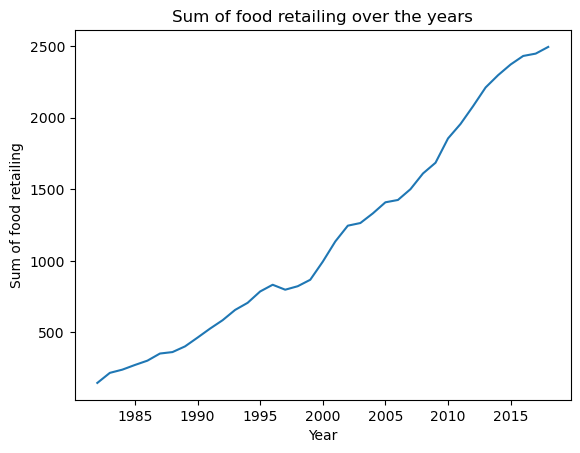

In [7]:
df_task.groupby(df_task['Year'])['food_retailing'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Sum of food retailing')
plt.title('Sum of food retailing over the years')
plt.show()

## Task 2. Us3 the adfuller tool to determine if the time series is stationary or not, $\alpha=0.05$. If not, find a proper order of differencing (d) in the ARIMA model to reach the stationarity, and report adfuller test results after differencing.


In [8]:
from statsmodels.tsa.stattools import adfuller

series=df_task1['food_retailing']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.548309
p-value: 0.999064
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


We can deduce that the time series isnt stationary as the P-value is greater than 0.05, i.e 0.99

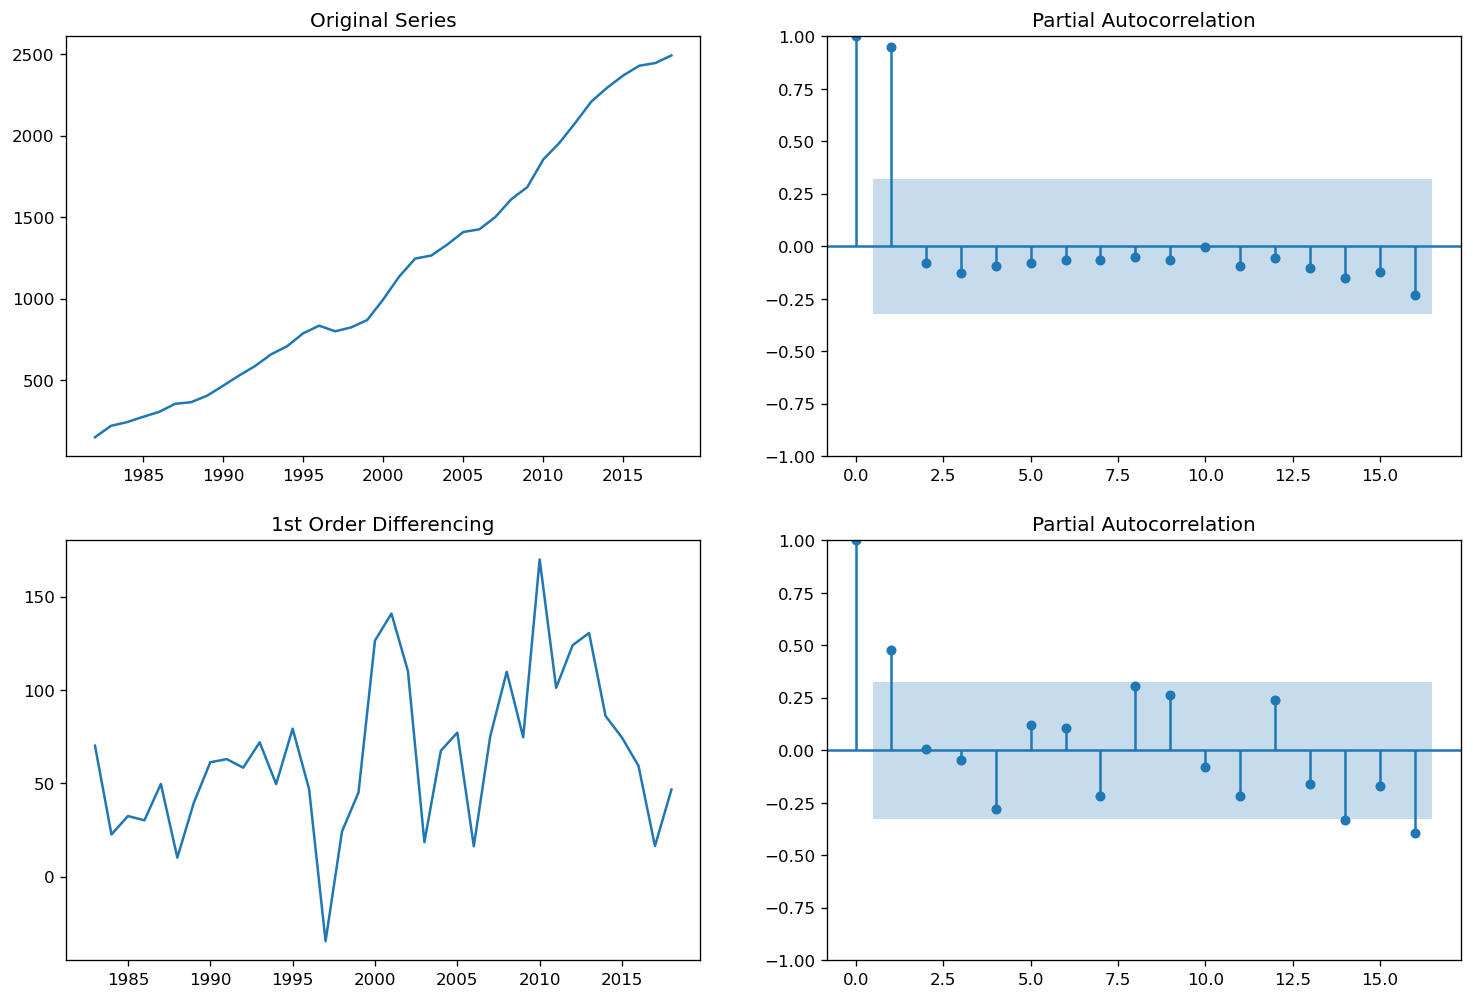

In [9]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(df_task1['food_retailing']); axes[0, 0].set_title('Original Series')
plot_pacf(df_task1['food_retailing'], ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')

# 1st Differencing
axes[1, 0].plot(df_task1['food_retailing'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df_task1['food_retailing'].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')



plt.show()

In [10]:
series=df_task1['food_retailing']
result = adfuller(series.dropna())
print('raw observations:')
print('  ADF Statistic: %f' % result[0])
print('  p-value: %f' % result[1])


# first order differencing
series=df_task1['food_retailing'].diff()
result = adfuller(series.dropna())
print('\n1st order differencing:')
print('  ADF Statistic: %f' % result[0])
print('  p-value: %f' % result[1])

# second order differencing
series=df_task1['food_retailing'].diff().diff()
result = adfuller(series.dropna())
print('\n2nd order differencing:')
print('  ADF Statistic: %f' % result[0])
print('  p-value: %f' % result[1])




raw observations:
  ADF Statistic: 2.548309
  p-value: 0.999064

1st order differencing:
  ADF Statistic: -3.444382
  p-value: 0.009536

2nd order differencing:
  ADF Statistic: -2.936616
  p-value: 0.041253


The alpha(p) value is <0.05, so the dataset is stationarized after 1st order of differencing

## Task 3. Analyze the PACF and ACF plots to determine appropriate number of AR, MA terms


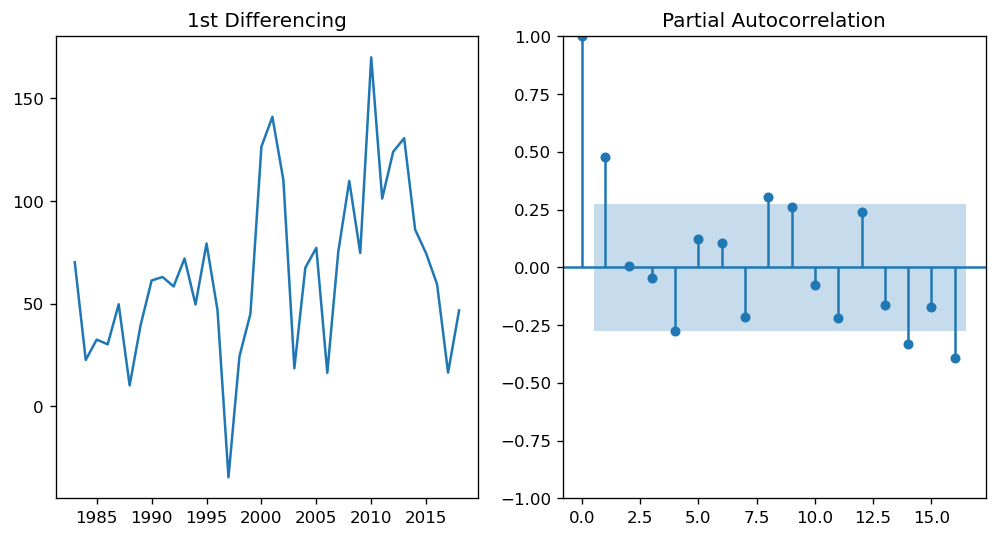

In [11]:
##AR term Q
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df_task1["food_retailing"].diff())
axes[0].set_title('1st Differencing')
# axes[1].set_ylim(0,1)
plot_pacf(df_task1["food_retailing"].diff().dropna(), ax=axes[1],alpha=0.1) #plot differences between consequtive observations

plt.show()

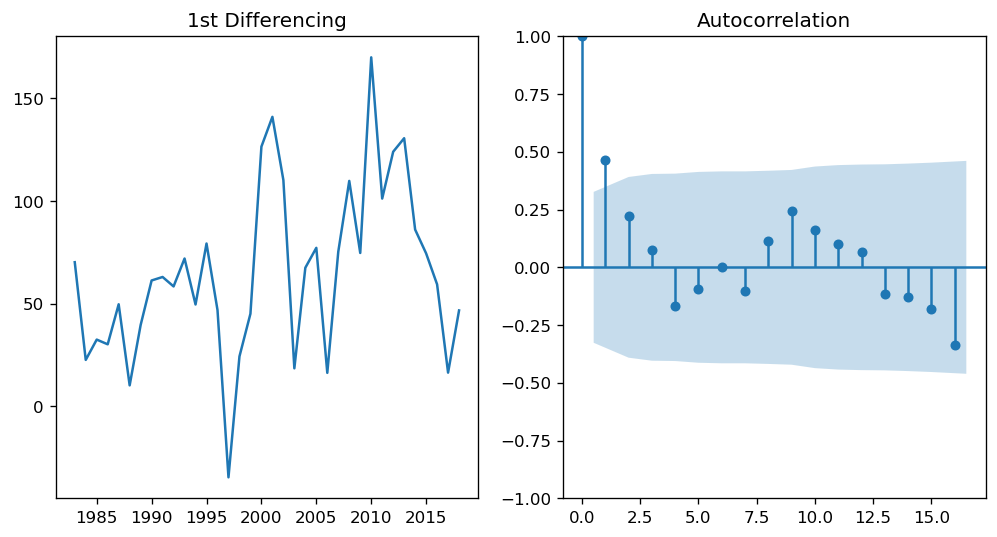

In [12]:
##MA term P
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df_task1["food_retailing"].diff()); axes[0].set_title('1st Differencing')
plot_acf(df_task1["food_retailing"].diff().dropna(), ax=axes[1])

plt.show()

Q= No. of AR terms = 1; AR coeff most significant at lag 1. P = No. of MA terms = 1; MA coeff most significant at lag 1

## Task 4

### Train a model on the first 30 datapoints using an ARIMA(1,1,1) then predict on the last that 30-datapoint training set as well as the last 7 data points. Report and comment on residual diagnostics for both train and test periods, including MAE, RSME, PACF, ACF, a normality test, and a formal autocorrelation test (e.g., Ljung–Box test).


C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         food_retailing   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -150.620
Date:                Tue, 14 Feb 2023   AIC                            307.240
Time:                        17:42:48   BIC                            311.342
Sample:                             0   HQIC                           308.525
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9917      0.037     26.998      0.000       0.920       1.064
ma.L1         -0.7771      0.186     -4.175      0.000      -1.142      -0.412
sigma2      1769.9082    442.308      4.002      0.0

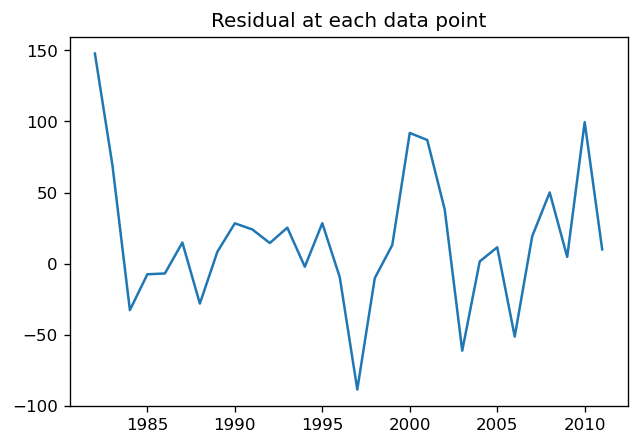

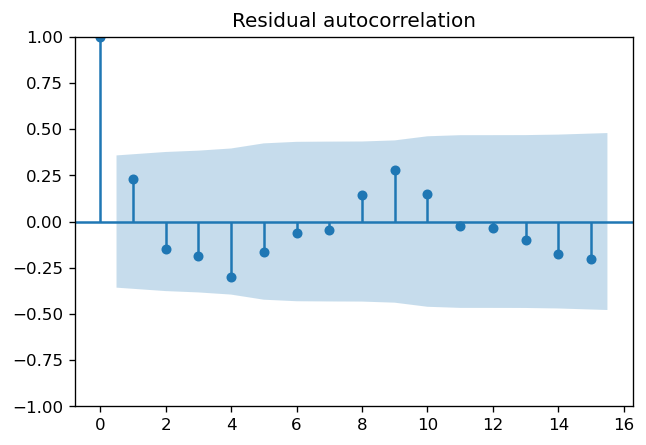

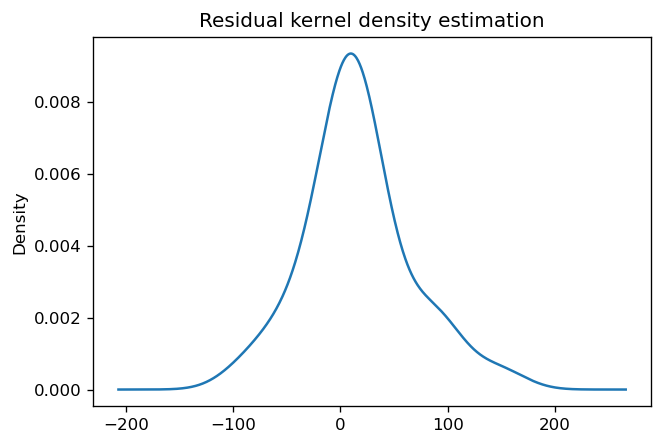

                0
count   30.000000
mean    16.266874
std     48.825874
min    -88.646861
25%     -7.398261
50%     12.233216
75%     28.372690
max    147.800000
p value is  0.17614753745640843
null hypothesis: residuals come from a normal distribution
The null hypothesis cannot be rejected
Ljung–Box:
    lb_stat  lb_pvalue
1  1.758331   0.184833
2  2.495772   0.287111
3  3.757632   0.288853
4  7.028119   0.134410
5  8.093675   0.151148
6  8.257999   0.219804


In [13]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

P=1
D=1
Q=1

# fit model
N=30   
series1 = df_task1['food_retailing']#values


model = sm.tsa.ARIMA(series1[:N], order=(Q,D,P))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [14]:
df_task1.reset_index(inplace=True)
#split dataset into train and test
train_data = df_task1['food_retailing'][:N]
test_data = df_task1['food_retailing'] [N:]

pred_train = model_fit.predict(start = 0, end=N-1)
pred_test = model_fit.predict(start= N, end= N+6)


C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [15]:
#MAE
mae_insample = mean_absolute_error(train_data, pred_train)
mae_outofsample = mean_absolute_error(test_data, pred_test)

print("MAE insample:", mae_insample)
print("MAE out-of-sample:", mae_outofsample)

MAE insample: 36.19598966629425
MAE out-of-sample: 54.74116695227882


In [16]:
mse_insample = np.mean((train_data - pred_train)**2)
rsme_insample = np.sqrt(mse_insample)

print("RSME insample:", rsme_insample)

mse_outofsample = np.mean((test_data - pred_test)**2)
rsme_outofsample = np.sqrt(mse_outofsample)

print("RSME outofsample:", rsme_outofsample)

RSME insample: nan
RSME outofsample: 59.477305417245006


## Task 5 
### Plot the original series, in-sample prediction results, and out-of-sample prediction results. Please label them properly.


C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Shantanu\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


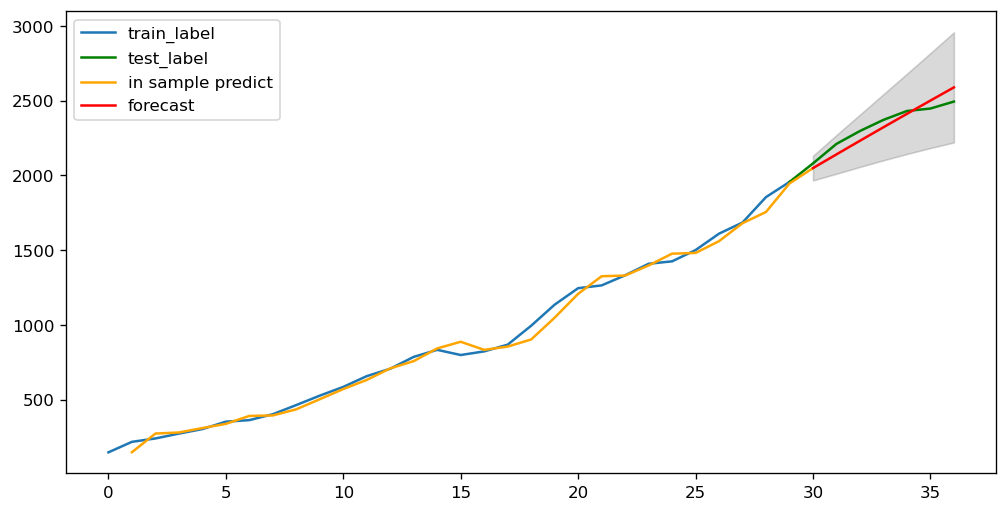

In [17]:
fcast = model_fit.forecast(steps=len(series1)-N)  # 95% conf
fc = model_fit.get_forecast(steps=len(series1)-N).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series1)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series1)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series1)))

plt.rcParams.update({'figure.figsize':(10,5)})
fig, ax = plt.subplots()
ax.plot(df_task1.index[:N],series1[:N],label='train_label') # train
ax.plot(df_task1.index[N-1:],series1[N-1:],color='green',label='test_label') # test
ax.plot(df_task1.iloc[1:N+1].index,model_fit.predict(start=1,end=N,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.fill_between(df_task1.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15) # conf
ax.legend(loc='upper left')

# Homework 2: Using ARIMA model to predict a one-direction random walk.
### Task 1, generate a one-dimensional random walk which starts at 0 and makes a step up or down with the equal probability. Simulate 1000 steps and use the random seed 1234. Visualize the result.


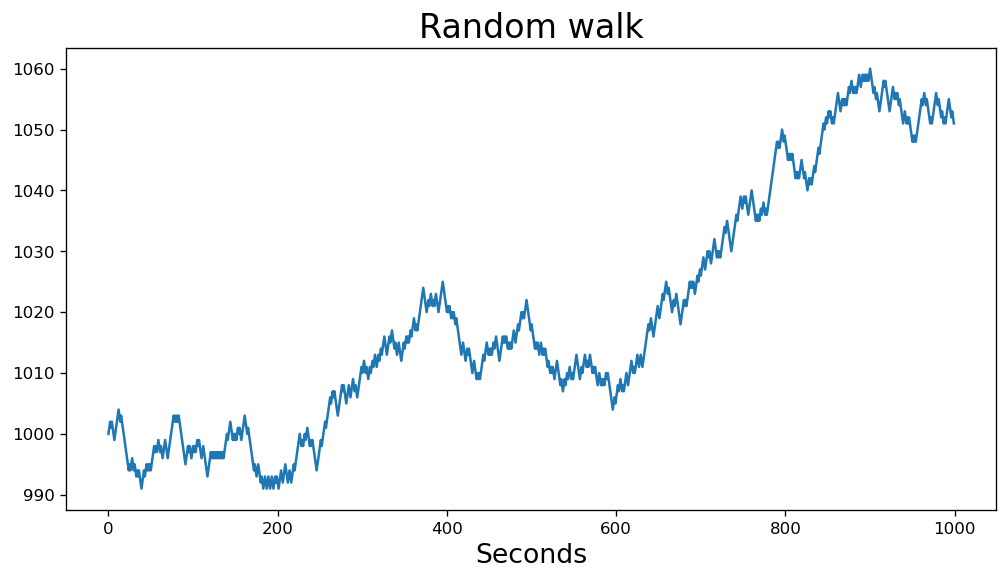

In [18]:
np.random.seed(1234)

pos = 1000  
walk = [pos] 
nsteps = 1000 
for i in range(nsteps):
    step = 1 if np.random.randint(0, 2) else -1 
    pos += step
    walk.append(pos)

plt.plot(walk[0:1000])
plt.title('Random walk', fontsize=20)
plt.xlabel('Seconds', fontsize=16)
plt.show()

### Task 2, difference the series to stationary, and report the adfuller test results, $\alpha=0.05$

In [19]:
from statsmodels.tsa.stattools import adfuller
walk = pd.Series(walk)
series = walk
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# first order differencing

series= walk.diff()
result = adfuller(series.dropna())
print('\n1st order differencing:')
print('  ADF Statistic: %f' % result[0])
print('  p-value: %f' % result[1])


ADF Statistic: -0.350132
p-value: 0.918098
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568

1st order differencing:
  ADF Statistic: -31.746941
  p-value: 0.000000


The model is stationarized after 1st order of differencing

### Task 3, PACF and ACF plot of the diferenced time-series.

Text(0.5, 1.0, 'Partial Autocorrelation')

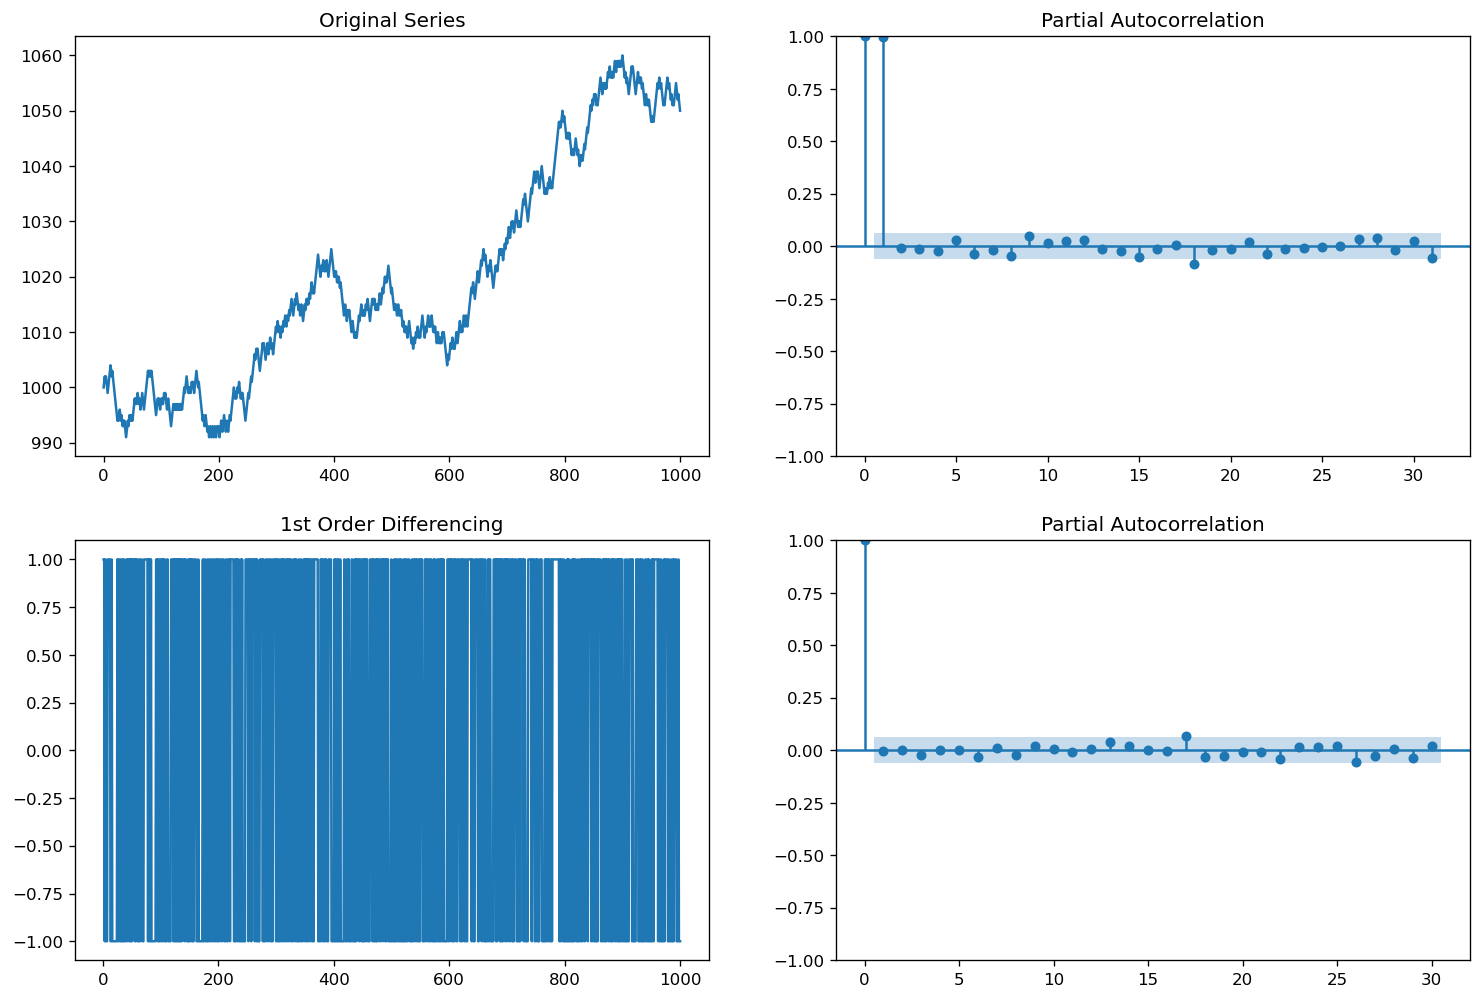

In [20]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(walk); axes[0, 0].set_title('Original Series')
plot_pacf(walk, ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')

# 1st Differencing
axes[1, 0].plot(walk.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(walk.diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

### Task 4, When analyzing the PACF and ACF results of the random walk, what pattern shows that ARIMA won't be a useful model for this time-series? Write down your statement.

When the first lag demonstrates substantial autocorrelation but subsequent lags exhibit minimal autocorrelation upon examining ACF and PACF plots, it suggests that an ARIMA model may not be suitable for the time series. The strong autocorrelation at the first lag indicates that the current value of the time series can be predicted with high accuracy based only on its previous value, making a complicated ARIMA model unnecessary and unlikely to produce improved results.